In [31]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# After executing the cell above, Drive files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

'10 days python study'
'1510537123735Resume_Pradip (1).pdf'
 1510537123735Resume_Pradip.pdf
 794B6DDF-00D6-4213-A522-F97D704D2B84.pdf
'Ableton.Live.Suite.v9.7.1 64x.rar'
 adult_data.csv.gsheet
'AIML at work.docx'
'Airport Ground Staff.gdoc'
'Assignment 2 Loops.R'
'Axis Bank Mini Statement .pdf'
'Bird Speciees Dataset'
 breast_c_Dataset.csv.gsheet
 Classroom
'Colab Notebooks'
'Computer vision'
'Contact Us_ Sales@oneworldtrip.co.in +91 91456 38691.zip'
'Copy of FoundationTextbook.pdf'
'Course Experience - Questionnaire.pages'
'CSR FnB Cirriculum_8jan.pdf'
'Curriculum Vitae pradip wasre 1oct 2018.docx'
 CV
 Dog_Breed_Prediction.ipynb
 FoundationTextbook.pdf
'Getting started.pdf'
'Hands on data1.gsheet'
'Health And Fitness SnS Fitness (1).pptx'
'Health And Fitness SnS Fitness.pptx'
'housing (1).csv.gsheet'
'housing (2).csv.gsheet'
 housing.csv.gsheet
 IDFCFIRSTBankstatement-10052550674.pdf
 IMG_3022.jpg
 IMG_3711.jpg
'Martin Garrix - Animals (Official Video).mp3'
'Meeting notes.gdoc'
 My-H

In [55]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

Let's visualize some of the bird images that we will be working on. Also we will observe x and y dimensions of the image.

In [34]:
# Setting path and creating empty list
dir = "/content/drive/My Drive/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []


In [35]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [36]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [37]:
# Storing number of classes
num_classes = len(label_counts)
num_classes

6

In [38]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

Check the shape of image labels which will be equal to the number of images we are going to work with.



In [39]:
label_list = np.array(label_list)
label_list.shape

(811,)

In [40]:
# Now we will split the data into training and testing using train_test_split() of sklearn
x_train, x_test, y_train, y_test = train_test_split(image_list,label_list,test_size= 0.25, random_state = 42)

In [41]:
# Next we will normalize the images by dividing them with 255. Also, we will reshape x_train and x_test.
# Normalization is the process we do mostly in the CNN or image classification
x_train = np.array(x_train, dtype = np.float16) / 225.0
x_test = np.array(x_test, dtype = np.float16) / 225.0
x_train = x_train.reshape(-1,224,224 ,3 )
x_test = x_test.reshape(-1,224 , 224, 3)

In [42]:
# Now we will use label binarizer to one-hot-encode to our y data. We will also print the sequence of the classes
# lable binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [43]:
# Splitting the training data set into training and validation data sets 
x_train, x_val, y_train,y_val = train_test_split(x_train,y_train,test_size= 0.2)

In [44]:
# Building model archtecture
model  = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 8)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 32)      

Now we will create the a network archtecture for the model. We have used different types of layers according to their features namely Conv_2d (it is used to create a convolutional kernel that is convolved with the input layer to produce the ouput tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window difined by poolsize), latten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel). In the last layer we will use softmax as the activation function because it is a multi class classification problem.

In [45]:
# Compiling model
model.compile(loss = "categorical_crossentropy", optimizer = Adam(0.0095), metrics = ['accuracy'])

In [46]:
# Compiling model
history = model.fit(x_train,y_train, batch_size = 128, epochs = 50, validation_data = (x_val, y_val))

Epoch 1/50
4/4 [==============================] - 16s 3s/step - loss: 1.9700 - accuracy: 0.1461 - val_loss: 1.7978 - val_accuracy: 0.1557
Epoch 2/50
4/4 [==============================] - 11s 3s/step - loss: 1.7424 - accuracy: 0.2160 - val_loss: 1.6992 - val_accuracy: 0.2705
Epoch 3/50
4/4 [==============================] - 11s 3s/step - loss: 1.7644 - accuracy: 0.2922 - val_loss: 1.9371 - val_accuracy: 0.1885
Epoch 4/50
4/4 [==============================] - 11s 3s/step - loss: 1.8008 - accuracy: 0.2160 - val_loss: 1.6906 - val_accuracy: 0.3197
Epoch 5/50
4/4 [==============================] - 11s 3s/step - loss: 1.6609 - accuracy: 0.2551 - val_loss: 1.6716 - val_accuracy: 0.1557
Epoch 6/50
4/4 [==============================] - 11s 3s/step - loss: 1.5895 - accuracy: 0.2325 - val_loss: 1.6029 - val_accuracy: 0.3770
Epoch 7/50
4/4 [==============================] - 11s 3s/step - loss: 1.4469 - accuracy: 0.4362 - val_loss: 1.4598 - val_accuracy: 0.4590
Epoch 8/50
4/4 [==================

In [47]:
# Saving Model
model.save("/content/drive/My Drive/bird_species.h5")

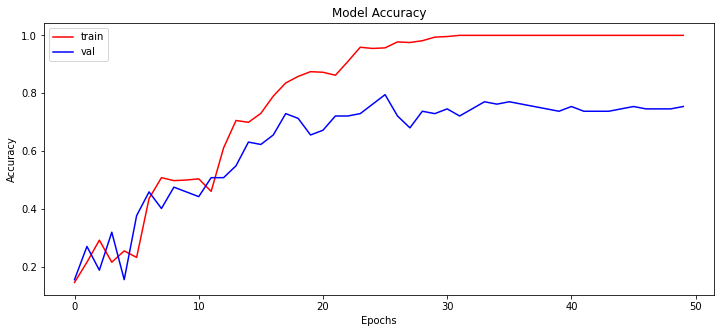

In [49]:
# Plot the training history
plt.figure(figsize = (12,5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [51]:
# Calcularing test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

7/7 [==============================] - 3s 345ms/step - loss: 1.6574 - accuracy: 0.7389
Test Accuracy: 73.8916277885437


In [52]:
# Storing Predictions
y_pred = model.predict(x_test)

7/7 [==============================] - 3s 312ms/step


In [56]:
# Plotting image to compare
img = img_to_array(x_test[5])
img

array([[[0.09777832, 0.47998047, 0.37329102],
        [0.10223389, 0.484375  , 0.37768555],
        [0.10668945, 0.48876953, 0.38232422],
        ...,
        [0.2088623 , 0.44433594, 0.38671875],
        [0.2133789 , 0.4489746 , 0.39111328],
        [0.2133789 , 0.4489746 , 0.39111328]],

       [[0.09777832, 0.47998047, 0.37329102],
        [0.10223389, 0.484375  , 0.37768555],
        [0.10668945, 0.48876953, 0.38232422],
        ...,
        [0.2088623 , 0.44433594, 0.38671875],
        [0.2133789 , 0.4489746 , 0.39111328],
        [0.2133789 , 0.4489746 , 0.39111328]],

       [[0.09777832, 0.47998047, 0.37329102],
        [0.09777832, 0.47998047, 0.37329102],
        [0.10223389, 0.484375  , 0.37768555],
        ...,
        [0.2088623 , 0.45336914, 0.38671875],
        [0.2088623 , 0.45336914, 0.38671875],
        [0.2088623 , 0.45336914, 0.38671875]],

       ...,

       [[0.12445068, 0.12890625, 0.14660645],
        [0.12890625, 0.13330078, 0.15112305],
        [0.11553955, 0

In [57]:
# Finding max value from prediction list and comparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally: ", labels[np.argmax(y_test[5])])
print("Pridicted: ", labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally:  BARN OWL
Pridicted:  FLAMINGO
